In [1]:
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving nlp-getting-started.zip to nlp-getting-started (1).zip


{'nlp-getting-started.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x8b\xa4\x90O71\xda\xa6\xff\xff\xff\xff\xff\xff\xff\xff\x15\x00\x14\x00sample_submission.csv\x01\x00\x10\x00\xdaX\x00\x00\x00\x00\x00\x00\x81\x1e\x00\x00\x00\x00\x00\x005\xdcM\xb2\xed \x8e\x04\xe0y\xad\xa5\x06\xb6\xf9\x93\x96\xd3\x11U\xd1\xd1\xd3\x8e\xda\x7f\x14G\x9f\xee\xe0\xdd|\xc7\x06\x8c\x0c\x98$%\xf8\xbf\x7f\xfd\xf3?\xff\xf3\xff\xff\xfb\xef\xff\xfc\xe3\xf9\xe7\xf3\x8f\xef\xfe\x1b\xf7_\xde\x7f\xef\xfb\xfb\xf3\xbb\xf2\xfd\xfe\xf7\xd5\xff\xce\xef\xcf\xef\xee\xf8%\x1f\xeb\xfe\x99\xbf\x1b\xf3\x97k\xd6\xcf\xfd\xfb\xf3K\xb7~\xd9V\xdc?\xfb\x97x\xff\xb2\x9d\xdf\xff\xce/\xc7\xf9%\x8e\xf9\xfb\xf3K\x1c\xbft\xf9\xbb\x9b\xbfkY5x\xaa\n\xcf\xa8\xbf\xbb\xfeF\xd5\xac\xae\xbf\xab\xfe\xd6\xf5\xaa\xdd\xfbU\xcao\xd6\xdf\xba[\x15~\xe7S\x7f+\xcdt\xa5\xcaYu}\xd5\xf5U\xb9V\xe5\xdaU\xe6\xae\x94U\xed\xf7\xd4\xffO\xfd?\xea\xe9Qi\xaa\xdao\xd4\xf5\xac7\xf4\xd4{|\xfc\x7f\xd7\xdfzi\xef\xac\xbf\xf5\xff\xaa\xe7W\xf5\xfc\xbc\xd2\xefW\xceW/\xf5\x1buw\xd4\xd

In [2]:
import pandas as pd

In [3]:
!unzip /content/nlp-getting-started.zip

Archive:  /content/nlp-getting-started.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
import tensorflow as tf

##### Scikit Learn modules needed for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCVn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Text Preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

In [5]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")


In [6]:
df_train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df_train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
df_train["word_count"] = df_train["text"].apply(lambda x: len(x.split(" ")))
df_train.head()

,id,keyword,location,text,target,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17


In [10]:
stopwords = set(stopwords.words("english"))

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()

In [12]:
# Method to preprocess my raw data
def preprocessText(x):
    temp = x.lower()
    temp = re.sub(r'[^\w]', ' ', temp)
    temp = nltk.word_tokenize(temp)
    temp = x.split(" ")
    temp = [wordnet_lemmatizer.lemmatize(w) for w in temp]
    temp = [word for word in temp if word not in stopwords ]
    temp = " ".join(temp)
    return temp

In [13]:
df_train["preprocessed_text"] = df_train["text"].apply(lambda x: preprocessText(x))
df_train.head()

,id,keyword,location,text,target,word_count,preprocessed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,Our Deeds Reason #earthquake May ALLAH Forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,All resident asked 'shelter place' notified of...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,Just got sent photo Ruby #Alaska smoke #wildfi...


In [14]:
#creating data for train and test

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [16]:
## Create Configuration for pipeline of input text vector for LSTM Classifier
MAX_VOCAB = 50000
EMBEDDINGS_DIM = 100
MAX_SEQ_LEN = 64

# Define Tokenizer
tokenizer =  Tokenizer(num_words=MAX_VOCAB)
tokenizer.fit_on_texts(df_train.preprocessed_text.values)
word_index = tokenizer.word_index
print(f"Total unique tokens in text --> {len(word_index)}")

Total unique tokens in text --> 22322


In [17]:
X = tokenizer.texts_to_sequences(df_train["preprocessed_text"].values)
X = pad_sequences(X, maxlen= MAX_SEQ_LEN)
print(f"Shape of input Tensor --> {X.shape}")

Shape of input Tensor --> (7613, 64)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,df_train.target, test_size=0.1,random_state= 20)
print(f"Shape of Training X --> {X_train.shape}")
print(f"Shape of Training y --> {y_train.shape}")
print(f"Shape of Testing X --> {X_test.shape}")
print(f"Shape of Test y --> {y_test.shape}")

Shape of Training X --> (6851, 64)
Shape of Training y --> (6851,)
Shape of Testing X --> (762, 64)
Shape of Test y --> (762,)


In [19]:
#Training the LSTm model
model = Sequential()
model.add(tf.keras.layers.Embedding(MAX_VOCAB,EMBEDDINGS_DIM,input_length = X.shape[1]))
model.add(tf.keras.layers.LSTM(100,dropout =0.2,return_sequences=True))
model.add(tf.keras.layers.LSTM(100,dropout =0.2,return_sequences=False))
model.add(tf.keras.layers.Dense(50, activation = "relu"))
model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           5000000   
                                                                 
 lstm (LSTM)                 (None, 64, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,166,891
Trainable params: 5,166,891
Non-

In [20]:
EPOCHS = 10
BATCH_SIZE = 62
history = model.fit(X_train, y_train,batch_size= BATCH_SIZE,epochs= EPOCHS,validation_split= 0.1)

Epoch 1/10
100/100 [==============================] - 29s 238ms/step - loss: 0.5662 - accuracy: 0.7080 - val_loss: 0.4916 - val_accuracy: 0.7755
Epoch 2/10
100/100 [==============================] - 24s 238ms/step - loss: 0.2880 - accuracy: 0.8895 - val_loss: 0.5346 - val_accuracy: 0.7653
Epoch 3/10
100/100 [==============================] - 24s 239ms/step - loss: 0.1417 - accuracy: 0.9487 - val_loss: 0.5956 - val_accuracy: 0.7770
Epoch 4/10
100/100 [==============================] - 23s 232ms/step - loss: 0.0688 - accuracy: 0.9758 - val_loss: 0.6978 - val_accuracy: 0.7478
Epoch 5/10
100/100 [==============================] - 25s 253ms/step - loss: 0.0434 - accuracy: 0.9883 - val_loss: 0.7323 - val_accuracy: 0.7347
Epoch 6/10
100/100 [==============================] - 25s 247ms/step - loss: 0.0311 - accuracy: 0.9909 - val_loss: 0.9029 - val_accuracy: 0.7449
Epoch 7/10
100/100 [==============================] - 24s 244ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 1.0519 - val_ac

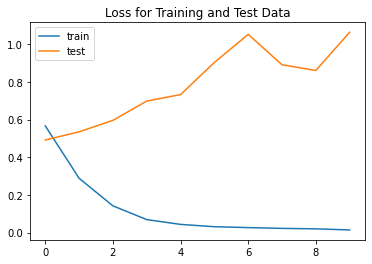

In [21]:
plt.plot(history.history["loss"], label ="train")
plt.plot(history.history["val_loss"], label ="test")
plt.legend()
plt.title("Loss for Training and Test Data")
plt.show()

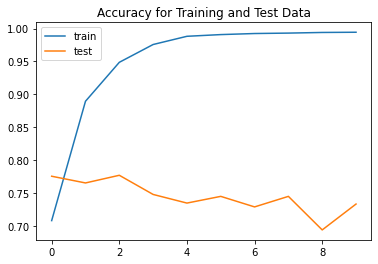

In [22]:

plt.plot(history.history["accuracy"], label ="train")
plt.plot(history.history["val_accuracy"], label ="test")
plt.legend()
plt.title("Accuracy for Training and Test Data")
plt.show()

In [23]:
#prediction on test data

In [24]:
def preprocess_test_text(text,MAX_SEQ_LEN = 64):
    seq = tokenizer.texts_to_sequences(text.values)
    pad_ = pad_sequences(seq, maxlen= MAX_SEQ_LEN)
    return pad_

In [25]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
X_valid = preprocess_test_text(text= df_test.text)
# X_valid = X_valid.reshape(-1,1)
X_valid.shape

(3263, 64)

In [27]:
y_pred = model(X_valid)
y_pred.shape

TensorShape([3263, 1])

In [28]:
y_pred_class = []
for item in y_pred:
    if item[0] >=0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0) 

In [29]:
print(y_pred[0:10])
print(y_pred_class[0:10])

tf.Tensor(
[[9.1426647e-01]
 [9.8979861e-01]
 [9.9940455e-01]
 [6.4414293e-01]
 [9.9999350e-01]
 [9.6994424e-01]
 [2.1290668e-06]
 [1.4275938e-02]
 [1.5436324e-01]
 [2.2450089e-04]], shape=(10, 1), dtype=float32)
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [30]:
sample_data = dict(id = df_test.id, target = y_pred_class)
sample_df = pd.DataFrame(sample_data)
sample_df.head(n=20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [31]:
sample_df.to_csv("submission_lstm_v1.csv",index= False)